<a href="https://colab.research.google.com/github/marcinwolter/DeepLearning_2020/blob/main/hyperopt_optuna_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
#Hyperopt demo - minimize x^2 function

from hyperopt import fmin, tpe, rand, hp, STATUS_OK, Trials, plotting
import matplotlib.pyplot as plt

fspace = {
    'x': hp.uniform('x', -5, 5)
}

def f(params):
    x = params['x']
    val = x**2
    return {'loss': val, 'status': STATUS_OK}
    
trials = Trials()

# possible algos: algo= (tpe.suggest, rand.suggest)
best = fmin(fn=f, space=fspace, algo=rand.suggest,  max_evals=1000, trials=trials)
print('best:', best)
print(' trials:')

#for trial in trials.trials[:2]:
#    print(trial)




100%|██████████| 1000/1000 [00:01<00:00, 887.23it/s, best loss: 7.403221406663448e-06]
best: {'x': -0.002720886143642076}
 trials:


In [76]:
print(trials.trials)

[{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 5.031855491674301, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [0]}, 'vals': {'x': [2.2431797724824243]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 12, 2, 10, 26, 6, 651000), 'refresh_time': datetime.datetime(2020, 12, 2, 10, 26, 6, 651000)}, {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 21.797634277668685, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [1]}, 'vals': {'x': [4.668793664070911]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 12, 2, 10, 26, 6, 653000), 'refresh_time': datetime.datetime(2020, 12, 2, 10, 26, 6, 653000)}, {'state': 2, 'tid': 2, 'spec': None, 'result': {'loss': 0.13741251178110842, 'status': 'ok'}, 'misc': {'tid': 2, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': 

avg best error: 7.403221406663448e-06


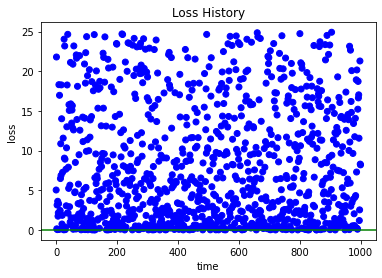

In [77]:
plotting.main_plot_history(trials)

Showing Histogram of 1000 jobs


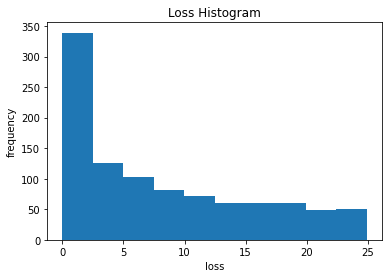

In [78]:
plotting.main_plot_histogram(trials)

finite loss range 7.403221406663448e-06 24.919363702100057 -0.9999925967785933


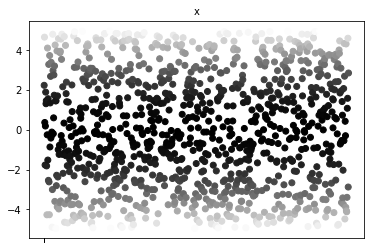

In [79]:
plotting.main_plot_vars(trials)

Text(0, 0.5, '$x$')

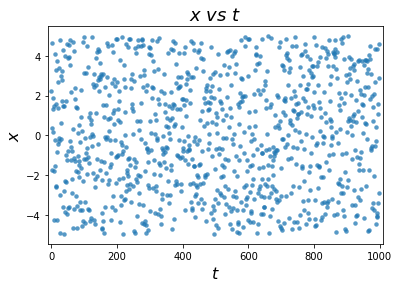

In [80]:
f, ax = plt.subplots(1)

xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['x'] for t in trials.trials]

ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$x$ $vs$ $t$ ', fontsize=18)
ax.set_xlabel('$t$', fontsize=16)
ax.set_ylabel('$x$', fontsize=16)

Text(0, 0.5, '$val$')

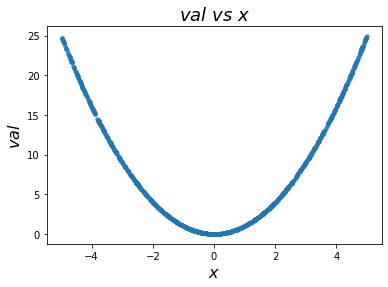

In [81]:
f, ax = plt.subplots(1)

xs = [t['misc']['vals']['x'] for t in trials.trials]
ys = [t['result']['loss'] for t in trials.trials]

ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$val$ $vs$ $x$ ', fontsize=18)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$val$', fontsize=16)

# **Optuna demo**

In [82]:
# install optuna
! pip install optuna

In [83]:


import optuna

def objective(trial):
    x = trial.suggest_uniform('x', -10, 10)
    y = trial.suggest_uniform('y', -10, 10)



    return (x - 2) ** 2 + (y-1) ** 2

study = optuna.create_study()
study = optuna.create_study(direction='minimize', pruner=optuna.pruners.MedianPruner(), sampler=optuna.samplers.TPESampler() )

study.optimize(objective, n_trials=200)

study.best_params  # E.g. {'x': 2.0912375440412942, 'y': 1.0091490823506173}

[I 2020-12-02 10:26:11,701] A new study created in memory with name: no-name-cb1f531f-dfcc-40ea-89bd-3e051e4d95d5
[I 2020-12-02 10:26:11,707] A new study created in memory with name: no-name-f75c9aaf-6738-4e88-9150-b4dd522095f9
[I 2020-12-02 10:26:11,709] Trial 0 finished with value: 57.88608470607021 and parameters: {'x': 9.543730067653353, 'y': 1.9890507431132853}. Best is trial 0 with value: 57.88608470607021.
[I 2020-12-02 10:26:11,712] Trial 1 finished with value: 77.84146348148295 and parameters: {'x': 7.675057357750987, 'y': 7.75538211115547}. Best is trial 0 with value: 57.88608470607021.
[I 2020-12-02 10:26:11,713] Trial 2 finished with value: 30.20380664368648 and parameters: {'x': 1.873419994829943, 'y': -4.494341102077448}. Best is trial 2 with value: 30.20380664368648.
[I 2020-12-02 10:26:11,716] Trial 3 finished with value: 63.37470080981132 and parameters: {'x': -5.002971773451921, 'y': 4.785906384215936}. Best is trial 2 with value: 30.20380664368648.
[I 2020-12-02 10:2

{'x': 1.9861479361827754, 'y': 0.8826160003629764}

## Visualizing the Optimization History

In [84]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

## Visualizing High-dimensional Parameter Relationships

In [85]:
from optuna.visualization import plot_parallel_coordinate

plot_parallel_coordinate(study, params=['x', 'y'])

## Visualizing Parameter Relationships

In [86]:
from optuna.visualization import plot_contour

plot_contour(study)

### Selecting Parameters to Visualize

In [87]:
plot_contour(study, params=['x', 'y'])

## Visualizing Individual Parameters

In [88]:
from optuna.visualization import plot_slice

plot_slice(study)

### Selecting Parameters to Visualize

In [89]:
plot_slice(study, params=['x', 'y'])

## Visualizing Parameter Importances

In [90]:
from optuna.visualization import plot_param_importances

plot_param_importances(study)